<a href="https://colab.research.google.com/github/Nani0012/Lomba-Data-Analyst/blob/main/lomba_gilco_IT_today_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libs for data manipulation
import pandas as pd
import numpy as np
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

#libs for data visulization & analysis
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning methods
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Loading Dataset

In [ ]:
from google.colab import files
upload=files.upload()

In [ ]:
df=pd.read_csv('QuadData.csv')

 Catatan :
 

1.   atribut Desroll, roll, dspitch, pich, DCRt, CRt => 1 (positif),  0 (negatif)

2.   atribut Desyaw,  yaw,  GCRS => 0-90 || 270 - 360 => 1, 90 - 270 => 0

3.   atribut ThH, DSAt, SAlt, VV, MOfsX/X1, MOfsY/Y1, MOfsZ/Z1, GWK => hapus



In [ ]:
df1= df.drop (columns=['DeviceID','ThH','DSAlt','SAlt','VV', 'GWk','MOfsX','MOfsY','MOfsZ','MOfsX_2','MOfsY_2','MOfsZ_2'])

# Spliting Data

In [ ]:
# pembuatan data test
df_test= df1 [df1.Lat.isnull()]
df_test.head()

,id,ExpID,PatternID,LineNo_ATT,TimeUS_ATT,DesRoll,Roll,DesPitch,Pitch,DesYaw,Yaw,ErrRP,ErrYaw,LineNo_CTUN,TimeUS_CTUN,ThI,ABst,ThO,DAlt,Alt,BAlt,TAlt,DCRt,CRt,LineNo_GPA,TimeUS_GPA,VDop,HAcc,VAcc,SAcc,SMS,Delta,LineNo_GPS,TimeUS_GPS,Status,GMS,NSats,HDop,Alt.1,Spd,...,LineNo_IMU,TimeUS_IMU,GyrX,GyrY,GyrZ,AccX,AccY,AccZ,LineNo_IMU2,TimeUS_IMU2,GyrX_2,GyrY_2,GyrZ_2,AccX_2,AccY_2,AccZ_2,LineNo_MAG,TimeUS_MAG,MagX,MagY,MagZ,OfsX,OfsY,OfsZ,LineNo_MAG2,TimeUS_MAG2,MagX_2,MagY_2,MagZ_2,OfsX_2,OfsY_2,OfsZ_2,LineNo_RCOU,TimeUS_RCOU,C1,C2,C3,C4,Lat,Lng
516,516,6,2,19366,1040251382,-1.07,-1.63,-9.88,-7.82,7.46,4.48,0.06,0.12,19365,1040249077,1.012069,0.009937,0.999997,7.85,4.949385,5.56,8.121006,219,33,19379,1040529135,1.12,0.6,1.04,0.14,1040529,200,19378,1040529135,4,554990400,14,0.77,216.94,2.251,...,19370,1040311468,-0.668874,0.119486,0.054740,-0.151994,-0.613387,-10.990130,19371,1040311468,-0.661670,0.099779,0.056224,-0.093485,-0.274948,-9.742661,19363,1040248904,360,-31,-237,-158,-119,359,19364,1040248904,223,-155,-327,65,212,348,19367,1040251672,1555,1683,1717,1816,NaN,NaN
517,517,6,2,19376,1040451414,-1.18,-6.20,-8.39,-7.27,5.92,5.24,0.06,0.13,19375,1040449078,0.910974,0.012931,0.953200,7.85,5.116856,5.67,8.303370,211,61,19389,1040729374,1.12,0.6,1.04,0.16,1040729,200,19388,1040729374,4,554990600,14,0.77,217.18,2.459,...,19380,1040511366,0.077552,0.042812,0.142666,-1.024520,-0.429405,-10.448690,19381,1040511366,0.068833,0.049602,0.147031,-0.939500,-0.156462,-10.756140,19373,1040448900,354,0,-229,-158,-119,359,19374,1040448900,287,-97,-315,65,212,348,19377,1040451681,1509,1596,1661,1816,NaN,NaN
518,518,6,2,19386,1040651648,1.10,-5.01,-5.59,-5.89,4.33,6.82,0.07,0.14,19385,1040649041,0.874147,0.008026,0.897921,7.85,5.311530,6.01,8.510817,201,79,19399,1040929453,1.12,0.6,1.03,0.18,1040929,200,19398,1040929453,4,554990800,14,0.77,217.47,2.463,...,19390,1040711328,0.261651,0.133059,0.046859,-1.960736,-0.554586,-10.197030,19391,1040711328,0.269558,0.161519,0.056292,-2.137223,-0.145224,-9.862360,19383,1040648842,354,-3,-231,-158,-119,359,19384,1040648842,226,-137,-315,65,212,348,19387,1040652033,1472,1543,1647,1816,NaN,NaN
519,519,6,2,19396,1040851480,3.58,-1.88,-2.96,-3.53,3.44,7.59,0.08,0.15,19395,1040849121,0.841221,0.002184,0.858245,7.85,5.521140,6.11,8.730696,191,84,19409,1041129296,1.12,0.6,1.03,0.19,1041129,200,19408,1041129296,4,554991000,14,0.77,217.69,2.149,...,19400,1040911401,0.429026,0.211752,0.056959,-1.393213,1.207994,-9.886065,19401,1040911401,0.414629,0.222587,0.056987,-1.703879,1.235037,-10.075160,19393,1040848948,356,-15,-216,-158,-119,359,19394,1040848948,234,-155,-299,65,212,348,19397,1040851882,1427,1582,1657,1816,NaN,NaN
520,520,6,2,19406,1041051389,4.35,2.57,-0.55,-0.23,3.12,8.23,0.06,0.16,19405,1041049433,0.846274,0.000770,0.839742,7.85,5.746502,6.56,8.965517,179,84,19419,1041329342,1.12,0.6,1.03,0.20,1041329,200,19418,1041329342,4,554991200,14,0.77,217.81,1.861,...,19410,1041111504,0.289911,0.272155,-0.075723,-2.160828,-0.687147,-9.720366,19411,1041111504,0.265685,0.287389,-0.067380,-1.601998,0.161640,-8.423182,19403,1041049091,379,-38,-197,-158,-119,359,19404,1041049091,314,-120,-272,65,212,348,19407,1041051650,1432,1528,1619,1816,NaN,NaN


In [ ]:
df_train=df1[~df1.Lat.isnull()]
df_train= df_train.drop(columns=['id'])
df_train.head()

,ExpID,PatternID,LineNo_ATT,TimeUS_ATT,DesRoll,Roll,DesPitch,Pitch,DesYaw,Yaw,ErrRP,ErrYaw,LineNo_CTUN,TimeUS_CTUN,ThI,ABst,ThO,DAlt,Alt,BAlt,TAlt,DCRt,CRt,LineNo_GPA,TimeUS_GPA,VDop,HAcc,VAcc,SAcc,SMS,Delta,LineNo_GPS,TimeUS_GPS,Status,GMS,NSats,HDop,Alt.1,Spd,GCrs,LineNo_IMU,TimeUS_IMU,GyrX,GyrY,GyrZ,AccX,AccY,AccZ,LineNo_IMU2,TimeUS_IMU2,GyrX_2,GyrY_2,GyrZ_2,AccX_2,AccY_2,AccZ_2,LineNo_MAG,TimeUS_MAG,MagX,MagY,MagZ,OfsX,OfsY,OfsZ,LineNo_MAG2,TimeUS_MAG2,MagX_2,MagY_2,MagZ_2,OfsX_2,OfsY_2,OfsZ_2,LineNo_RCOU,TimeUS_RCOU,C1,C2,C3,C4,Lat,Lng
0,6,2,14206,867051417,-2.52,-0.74,-2.30,-1.55,359.96,2.12,0.10,0.03,14205,867049441,0.555876,0.000247,0.546026,-0.296357,-0.234196,0.17,1.502355,-56,-55,14219,867309420,1.12,0.58,0.96,0.21,867309,200,14218,867309420,4,554817200,14,0.77,215.19,0.391,187.2020,14210,867111541,0.078031,-0.032413,-0.226329,0.226690,-0.065972,-10.823730,14211,867111541,0.073894,-0.020910,-0.218172,-0.119277,-0.180437,-10.886220,14203,867049114,382,-12,-200,-158,-119,359,14204,867049114,247,-138,-275,65,212,348,14207,867051676,1536,1578,1719,1726,-6.557158,106.733964
1,6,2,14216,867251550,-2.64,0.28,-2.95,-1.02,359.96,359.69,0.12,0.02,14215,867249301,0.540934,0.000086,0.546892,-0.396357,-0.332534,0.04,1.403758,-56,-56,14229,867509424,1.12,0.58,0.95,0.25,867509,200,14228,867509424,4,554817400,14,0.77,215.10,0.242,187.2020,14220,867311487,0.048311,-0.123246,-0.176451,1.294079,-0.242524,-9.683836,14221,867311487,0.043921,-0.143682,-0.178176,0.497582,-0.190082,-9.850414,14213,867249035,385,4,-193,-158,-119,359,14214,867249035,284,-107,-277,65,212,348,14217,867251950,1581,1553,1697,1733,-6.557158,106.733964
2,6,2,14226,867451412,-2.80,-0.42,-3.46,-1.85,359.96,357.66,0.11,0.02,14225,867449087,0.540462,0.000329,0.541243,-0.496357,-0.421786,0.11,1.314110,-57,-51,14239,867709368,1.12,0.58,0.96,0.27,867709,200,14238,867709368,4,554817600,14,0.77,215.07,0.016,187.2020,14230,867511687,-0.116384,-0.149578,-0.116427,0.966332,-0.033429,-10.370030,14231,867511687,-0.146389,-0.144665,-0.108821,1.018969,0.316950,-9.909281,14223,867448904,387,12,-196,-158,-119,359,14224,867448904,257,-103,-278,65,212,348,14227,867451674,1601,1540,1690,1726,-6.557159,106.733964
3,6,2,14236,867651882,-2.63,-1.31,-3.70,-3.97,359.96,356.25,0.11,0.02,14235,867649120,0.509038,0.001363,0.525917,-0.596357,-0.506052,-0.16,1.229523,-59,-54,14249,867909381,1.12,0.58,0.96,0.23,867909,200,14248,867909381,4,554817800,14,0.77,215.02,0.236,215.8407,14240,867711867,0.153803,-0.058657,-0.064778,0.123401,-0.263345,-9.462250,14241,867711867,0.127449,-0.063853,-0.057500,-0.090306,0.768961,-9.291891,14233,867648947,373,27,-207,-158,-119,359,14234,867648947,244,-94,-290,65,212,348,14237,867652298,1604,1529,1712,1683,-6.557159,106.733964
4,6,2,14246,867851500,-2.38,-0.74,-2.95,-4.04,359.96,355.72,0.10,0.03,14245,867849247,0.471022,0.001111,0.508583,-0.696357,-0.581820,-0.17,1.153755,-61,-59,14259,868109400,1.12,0.58,0.96,0.25,868109,200,14258,868109400,4,554818000,14,0.77,214.98,0.098,215.8407,14250,867911466,0.149147,0.215911,-0.013916,-0.066849,-0.357280,-10.605320,14251,867911466,0.145377,0.196375,-0.012828,0.500610,-0.134041,-9.741194,14243,867848953,370,41,-215,-158,-119,359,14244,867848953,265,-78,-296,65,212,348,14247,867851877,1594,1520,1682,1693,-6.557159,106.733964


# Check for Perfect Multicolliniearity

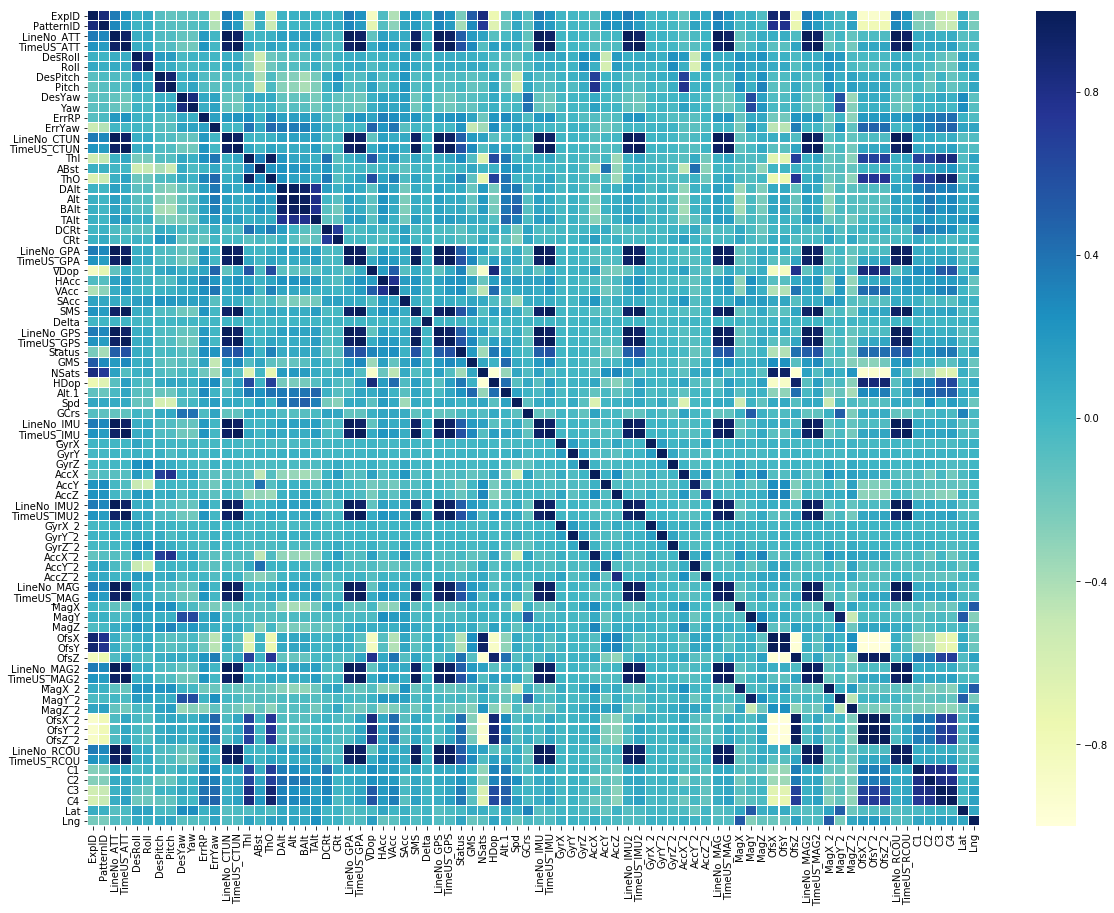

In [ ]:
corrmat = df_train.corr() 
  
f, ax = plt.subplots(figsize =(20, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
corr= df_train.corr()
display(corr)

,ExpID,PatternID,LineNo_ATT,TimeUS_ATT,DesRoll,Roll,DesPitch,Pitch,DesYaw,Yaw,ErrRP,ErrYaw,LineNo_CTUN,TimeUS_CTUN,ThI,ABst,ThO,DAlt,Alt,BAlt,TAlt,DCRt,CRt,LineNo_GPA,TimeUS_GPA,VDop,HAcc,VAcc,SAcc,SMS,Delta,LineNo_GPS,TimeUS_GPS,Status,GMS,NSats,HDop,Alt.1,Spd,GCrs,LineNo_IMU,TimeUS_IMU,GyrX,GyrY,GyrZ,AccX,AccY,AccZ,LineNo_IMU2,TimeUS_IMU2,GyrX_2,GyrY_2,GyrZ_2,AccX_2,AccY_2,AccZ_2,LineNo_MAG,TimeUS_MAG,MagX,MagY,MagZ,OfsX,OfsY,OfsZ,LineNo_MAG2,TimeUS_MAG2,MagX_2,MagY_2,MagZ_2,OfsX_2,OfsY_2,OfsZ_2,LineNo_RCOU,TimeUS_RCOU,C1,C2,C3,C4,Lat,Lng
ExpID,1.000000,0.852511,0.352575,0.228116,0.034614,0.086734,-0.087361,-0.135908,-0.118115,-0.112426,-0.091203,-0.526330,0.352407,0.227791,-0.562645,0.042230,-0.633317,0.023225,0.041318,0.045471,0.036787,-0.003177,0.036739,0.352084,0.227512,-0.856475,-0.061069,-0.415468,0.129193,0.227512,0.001100,0.352084,0.227512,-0.222104,0.518562,0.840327,-0.754238,-0.124672,0.099403,-0.084962,0.352710,0.228194,0.005684,-0.010138,-0.019325,-0.121002,0.222133,0.232093,0.352710,0.228194,-0.021827,0.009995,-0.017999,-0.133916,0.068543,0.093621,0.352407,0.227766,0.013980,0.041875,-0.056783,0.902144,0.898712,-0.834285,0.352407,0.227766,0.072148,-0.042474,0.112407,-0.907681,-0.914060,-0.883823,0.352575,0.228116,-0.271309,-0.267961,-0.560341,-0.595646,0.057289,-0.214096
PatternID,0.852511,1.000000,0.291060,0.178234,0.009036,0.049817,-0.054292,-0.088150,-0.104428,-0.083016,-0.046488,-0.430281,0.290977,0.178048,-0.485275,0.037225,-0.538522,-0.007135,0.005359,-0.004926,0.000886,0.024540,0.072658,0.290648,0.177647,-0.700123,-0.082707,-0.292831,0.098743,0.177647,0.000584,0.290648,0.177647,-0.379523,0.276741,0.719067,-0.650844,-0.162072,0.088025,-0.110923,0.291283,0.178411,0.004141,-0.013416,-0.016324,-0.077892,0.258468,0.221324,0.291283,0.178411,-0.014951,0.007649,-0.015800,-0.091626,0.118033,0.088280,0.290977,0.178010,-0.024298,0.034795,-0.027070,0.780235,0.777886,-0.730655,0.290977,0.178010,0.037508,-0.038270,0.146346,-0.783952,-0.788088,-0.767406,0.291060,0.178234,-0.257610,-0.263929,-0.506352,-0.513673,0.037406,-0.231798
LineNo_ATT,0.352575,0.291060,1.000000,0.937870,0.049636,0.077002,-0.059636,-0.069400,-0.136104,-0.142028,0.193133,-0.002994,1.000000,0.937688,0.021375,-0.005999,0.041685,0.145442,0.147113,0.120521,0.153542,-0.053119,-0.035971,0.999999,0.937662,-0.129465,0.147116,0.065601,0.083263,0.937662,0.000906,0.999999,0.937662,0.495022,0.183302,0.134144,-0.094876,-0.034899,0.077042,-0.136287,0.999998,0.937503,-0.002643,0.000510,-0.011279,-0.097621,-0.017857,-0.009192,0.999998,0.937503,0.003002,0.018238,-0.013008,-0.084860,-0.046365,0.012491,1.000000,0.937683,-0.132430,-0.031997,0.060483,0.051171,0.051993,-0.062281,1.000000,0.937683,-0.120644,-0.011745,-0.135625,-0.049725,-0.047819,-0.055085,1.000000,0.937870,0.066608,0.081393,0.031529,0.061815,-0.087067,-0.063210
TimeUS_ATT,0.228116,0.178234,0.937870,1.000000,0.056266,0.076844,-0.065135,-0.065589,-0.182755,-0.191399,0.223525,-0.009152,0.938009,0.999920,0.096828,-0.008147,0.125166,0.071696,0.072412,0.059440,0.166977,-0.051433,-0.022574,0.938059,0.999812,0.072311,0.220287,0.186024,0.061684,0.999812,0.001171,0.938059,0.999812,0.577126,0.281491,-0.076747,0.154827,0.103510,0.073116,-0.126024,0.938158,0.999833,-0.001785,-0.000285,-0.009489,-0.086893,-0.075915,-0.055172,0.938158,0.999833,0.005476,0.010918,-0.010068,-0.071084,-0.085915,0.013940,0.938009,0.999917,-0.128743,-0.036845,0.085797,-0.100356,-0.101377,0.113448,0.938009,0.999917,-0.161635,-0.040724,-0.196721,0.098543,0.096124,0.105151,0.937870,1.000000,0.089165,0.103507,0.105623,0.144290,-0.043253,-0.064577
DesRoll,0.034614,0.009036,0.049636,0.056266,1.000000,0.847402,0.164586,0.178590,-0.036558,0.017342,0.026689,-0.000263,0.049675,0.057651,-0.211687,-0.549639,-0.166758,-0.110362,-0.096786,-0.090501,0.012670,-0.111770,0.026259,0.049629,0.057635,-0.000672,0.041790,0.013808,0.157798,0.057635,-0.003846,0.049629,0.057635,0.061803,0.046224,0.026118,-0.032394,-0.100686,-0.150624,0.004213,0.049697,0.057624,0.107557

In [ ]:
df_train1=df_train
df_train2=df_train.drop(columns=['MagX','MagX_2','MagY','MagY_2','AccX_2','AccZ_2','AccZ','AccX','GyrZ_2','GyrZ','Spd','Status','LineNo_GPS','TimeUS_IMU','LineNo_GPA',
                                 'Alt.1','HDop','VAcc','GMS','Delta','TimeUS_GPS','DesRoll', 'Roll', 'DesPitch', 'Pitch', 'DCRt', 'CRt','NSats','ExpID','Alt','DesYaw',
                                 'DAlt','GyrX_2','GyrX','OfsX_2','OfsY_2','PatternID','VDop','TimeUS_MAG2','TimeUS_IMU2','TimeUS_GPA','C1','C2','MagZ_2','BAlt','Yaw',
                                 'OfsX','OfsY','OfsZ','OfsZ_2','ErrYaw','ABst','OfsY_2','LineNo_MAG2','LineNo_MAG','LineNo_IMU2','LineNo_ATT','ThI'], axis = 1)

X1 = sm.tools.add_constant(df_train1)
X2 = sm.tools.add_constant(df_train2)

#create a series for both
seriesb = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
seriesa = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

#display
print('Data Before')
print('-'*100)
display(seriesb)

print('Data After')
print('-'*100)
display(seriesa)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Data Before
----------------------------------------------------------------------------------------------------


const          0.000000e+00
ExpID          3.513503e+02
PatternID      1.011172e+01
LineNo_ATT              inf
TimeUS_ATT     1.370959e+13
DesRoll        7.481879e+00
Roll           8.051751e+00
DesPitch       8.443344e+00
Pitch          1.117958e+01
DesYaw         5.001184e+00
Yaw            5.009735e+00
ErrRP          1.732082e+00
ErrYaw         3.350822e+00
LineNo_CTUN             inf
TimeUS_CTUN    1.902461e+05
ThI            6.206216e+01
ABst           4.269842e+00
ThO            7.397561e+01
DAlt           2.566630e+02
Alt            2.957945e+02
BAlt           3.154274e+01
TAlt           9.541143e+00
DCRt           9.735724e+00
CRt            8.793810e+00
LineNo_GPA              inf
TimeUS_GPA              inf
VDop           9.222947e+01
HAcc           5.996195e+00
VAcc           8.932384e+00
SAcc           1.523593e+00
                   ...     
GyrX_2         8.570317e+01
GyrY_2         1.417236e+02
GyrZ_2         4.534873e+03
AccX_2         2.966910e+01
AccY_2         1.144

Data After
----------------------------------------------------------------------------------------------------


const          0.000000e+00
TimeUS_ATT     1.174341e+13
ErrRP          1.485441e+00
LineNo_CTUN    6.862088e+06
TimeUS_CTUN    1.839810e+05
ThO            7.306968e+00
TAlt           1.413948e+00
HAcc           1.555545e+00
SAcc           1.262213e+00
SMS            3.403117e+03
GCrs           1.240202e+00
LineNo_IMU     9.178418e+05
GyrY           1.060584e+02
AccY           9.861903e+00
GyrY_2         1.060412e+02
AccY_2         9.644223e+00
TimeUS_MAG     1.761176e+05
MagZ           1.107173e+00
LineNo_RCOU    4.469108e+06
TimeUS_RCOU    1.174341e+13
C3             1.060329e+01
C4             1.534768e+01
Lat            1.291345e+00
Lng            1.244209e+00
dtype: float64

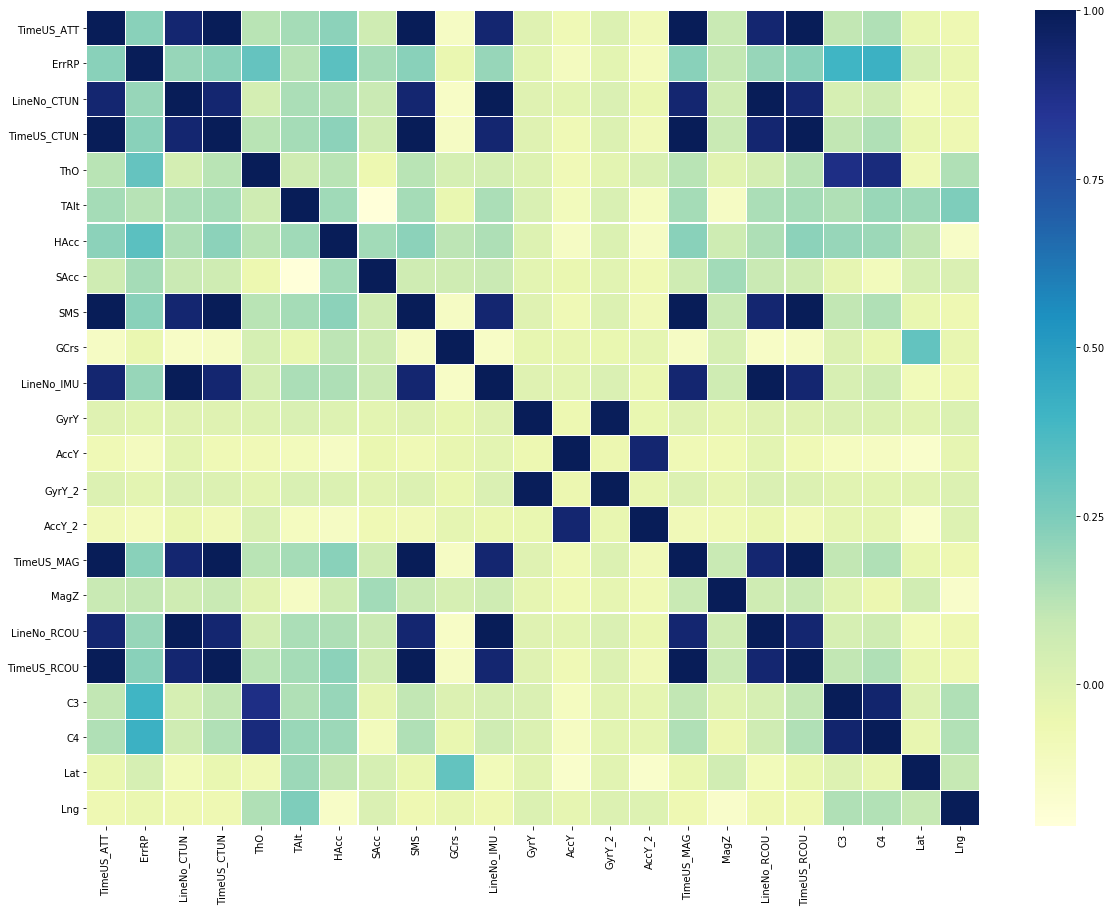

In [ ]:
corrmat = df_train2.corr() 
  
f, ax = plt.subplots(figsize =(20, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# Model

In [ ]:
# define our input variable and our output variable
X = df_train2.drop('Lat', axis=1)
Y = df_train2[['Lat']]

X1 = df_train2.drop('Lng', axis=1)
Y1 = df_train2[['Lng']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state=1)

regresLat = LinearRegression()
regresLng = LinearRegression()

regresLat.fit(X_train, Y_train)
regresLng.fit(X1_train, Y1_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_test=np.array(Y_test)
Y1_test=np.array(Y1_test)


In [ ]:
#exploring the output Lat
intercept = regresLat.intercept_[0]
coefLat = regresLat.coef_[0][0]

print("The intercept Lat for our model is {:.4}".format(intercept))
print('-'*100)

for coef in zip(X.columns, regresLat.coef_[0]):
  print("The coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept Lat for our model is -16.16
----------------------------------------------------------------------------------------------------
The coefficient for TimeUS_ATT is -4.9e-08
The coefficient for ErrRP is 0.0002
The coefficient for LineNo_CTUN is -5.8e-06
The coefficient for TimeUS_CTUN is -2.5e-08
The coefficient for ThO is -0.00026
The coefficient for TAlt is 7e-06
The coefficient for HAcc is 0.00016
The coefficient for SAcc is 2.9e-05
The coefficient for SMS is 2.9e-10
The coefficient for GCrs is 5.1e-07
The coefficient for LineNo_IMU is 5.3e-08
The coefficient for GyrY is -0.00079
The coefficient for AccY is -1.9e-05
The coefficient for GyrY_2 is 0.00077
The coefficient for AccY_2 is -4.8e-06
The coefficient for TimeUS_MAG is 2.5e-08
The coefficient for MagZ is 1.1e-07
The coefficient for LineNo_RCOU is 5.7e-06
The coefficient for TimeUS_RCOU is 4.9e-08
The coefficient for C3 is 3.7e-07
The coefficient for C4 is -1.5e-07
The coefficient for Lng is 0.09


In [ ]:
#exploring the output Lng
intercept = regresLng.intercept_[0]
coefLng = regresLng.coef_[0][0]

print("The intercept Lng for our model Lat is {:.4}".format(intercept))
print('-'*100)

for coef in zip(X.columns, regresLng.coef_[0]):
  print("The coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept Lng for our model Lat is 107.5
----------------------------------------------------------------------------------------------------
The coefficient for TimeUS_ATT is 3e-08
The coefficient for ErrRP is -0.00043
The coefficient for LineNo_CTUN is 8.1e-06
The coefficient for TimeUS_CTUN is 5.2e-09
The coefficient for ThO is 0.00017
The coefficient for TAlt is 1.4e-05
The coefficient for HAcc is -0.00099
The coefficient for SAcc is 0.0005
The coefficient for SMS is 7.9e-10
The coefficient for GCrs is -1.4e-07
The coefficient for LineNo_IMU is -1.4e-06
The coefficient for GyrY is 0.00021
The coefficient for AccY is -5e-05
The coefficient for GyrY_2 is -0.0002
The coefficient for AccY_2 is 5.1e-05
The coefficient for TimeUS_MAG is -5.2e-09
The coefficient for MagZ is -3.5e-07
The coefficient for LineNo_RCOU is -6.7e-06
The coefficient for TimeUS_RCOU is -3e-08
The coefficient for C3 is 1.7e-07
The coefficient for C4 is -1.5e-07
The coefficient for Lng is 0.11


In [ ]:
PLat = regresLat.predict(X_test)
yp1=np.array(PLat)
yp1=yp1.flatten()

PLng = regresLng.predict(X1_test)
yp2=np.array(PLng)
yp2=yp2.flatten()

ypredict={'Lat':yp1,'Lng':yp2}
ypredict

{'Lat': array([-6.55713344, -6.55705585, -6.55722381, ..., -6.55717677,
        -6.55722969, -6.55711959]),
 'Lng': array([106.73398679, 106.73397399, 106.73404606, ..., 106.7340391 ,
        106.73392533, 106.73405149])}

In [ ]:
df_ypredict=pd.DataFrame(ypredict)
df_ypredict.head()

,Lat,Lng
0,-6.557133,106.733987
1,-6.557056,106.733974
2,-6.557224,106.734046
3,-6.557284,106.734038
4,-6.557229,106.733803


# Evaluasi

In [ ]:

!pip install haversine

In [ ]:
from haversine import haversine
error_list=[]
for i in range(1,len(df_ypredict)):
  data1=[df_ypredict['Lat'][i-1],df_ypredict['Lng'][i-1]]
  data2= Y_test[i-1], Y1_test[i-1]
  error=haversine(data1,data2)
  error_list.append(error)

In [ ]:
print(sum(error_list)/len(error_list))

0.14848707256562219
